In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Earthquake_dataset.csv")
df

,Date,Time (utc),Region,Magnitude,Depth (km),Latitude,Longitude,Mode,Map
0,23/06/2024,04:51:49,"Mindanao, Philippine",4.8,342,8.01 N,125.20 E,A,-
1,23/06/2024,03:58:03,Near Coast of Venezuela,5.9,105,10.80 N,62.65 W,A,-
2,23/06/2024,03:12:08,"Near East Coast of Honshu, japan",5.0,55,37.16 N,141.09 E,A,-
3,22/06/2024,20:46:51,Near Coast of Peru,5.3,64,15.79 S,74.47 W,A,-
4,22/06/2024,18:08:44,Afghanistan-Tajikistan Border Region,3.8,179,36.36 N,71.45 E,M,-
...,...,...,...,...,...,...,...,...,...
14721,27/11/2015,16:40:28,Near Sirinagar Kashmir,4.8,10,34.22N,74.95E,M,-
14722,26/11/2015,16:18:00,Dadu Pakistan,3.0,30,26.72N,67.85E,M,-
14723,22/11/2015,18:16:04,Afghanistan-Tajikistan Border,6.2,86,36.43N,71.61E,M,-
14724,19/11/2015,23:38:47,50 km East of Bhakkar,3.8,10,31.60N,71.62E,M,-


In [3]:
# Replacing empty strings or non-numeric values with NaN and drop rows with any NaN values
df.replace("",np.nan,inplace=True)
df.dropna(subset=['Date','Time (utc)','Magnitude','Depth (km)','Latitude','Longitude'],inplace=True)

In [4]:
# Converting Date and Time columns to datetime
df["Datetime"]=pd.to_datetime(df['Date']+' '+df['Time (utc)'],format='%d/%m/%Y %H:%M:%S' )


In [5]:
# Converting Magnitude and Depth columns to numeric types
df["Magnitude"]=pd.to_numeric(df["Magnitude"],errors="coerce")
df["Depth (km)"]=pd.to_numeric(df["Depth (km)"],errors="coerce")

In [6]:
# Converting Latitude and Longitude to floats after removing directional indicators
df['Latitude'] = df['Latitude'].str.extract(r'(\d+\.\d+)')[0].astype(float) * df['Latitude'].str.extract(r'([NS])')[0].map({'N': 1, 'S': -1})
df['Longitude'] = df['Longitude'].str.extract(r'(\d+\.\d+)')[0].astype(float) * df['Longitude'].str.extract(r'([EW])')[0].map({'E': 1, 'W': -1})

In [7]:
# Dropping any rows with missing values
df.dropna(inplace=True)

In [8]:
df.head()

,Date,Time (utc),Region,Magnitude,Depth (km),Latitude,Longitude,Mode,Map,Datetime
0,23/06/2024,04:51:49,"Mindanao, Philippine",4.8,342,8.01,125.20,A,-,2024-06-23 04:51:49
1,23/06/2024,03:58:03,Near Coast of Venezuela,5.9,105,10.80,-62.65,A,-,2024-06-23 03:58:03
2,23/06/2024,03:12:08,"Near East Coast of Honshu, japan",5.0,55,37.16,141.09,A,-,2024-06-23 03:12:08
3,22/06/2024,20:46:51,Near Coast of Peru,5.3,64,-15.79,-74.47,A,-,2024-06-22 20:46:51
4,22/06/2024,18:08:44,Afghanistan-Tajikistan Border Region,3.8,179,36.36,71.45,M,-,2024-06-22 18:08:44


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

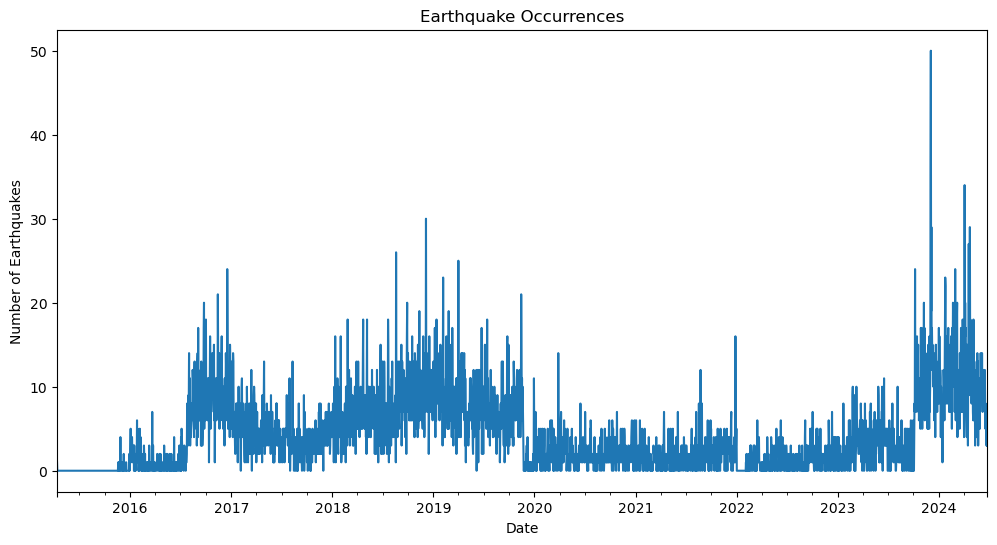

In [10]:
plt.figure(figsize=(12, 6))
df.set_index('Datetime').resample('D').size().plot()
plt.title('Earthquake Occurrences')
plt.xlabel('Date')
plt.ylabel('Number of Earthquakes')
plt.show()

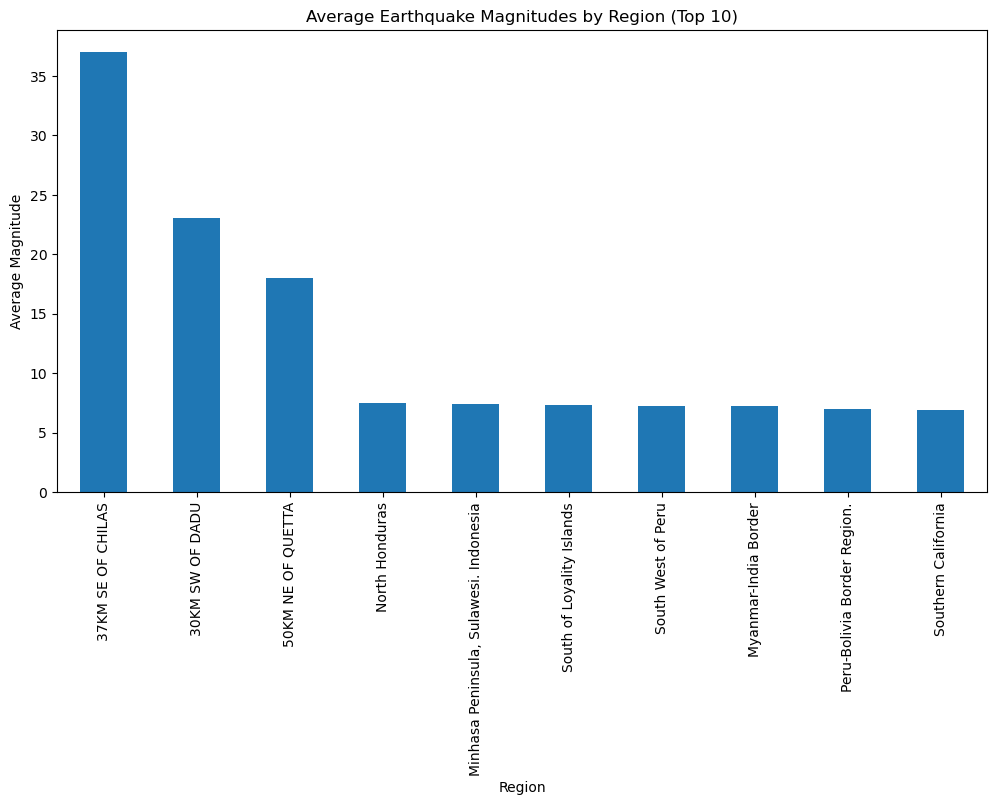

In [11]:
plt.figure(figsize=(12, 6))
region_magnitudes = df.groupby('Region')['Magnitude'].mean().sort_values(ascending=False).head(10)
region_magnitudes.plot(kind='bar')
plt.title('Average Earthquake Magnitudes by Region (Top 10)')
plt.xlabel('Region')
plt.ylabel('Average Magnitude')
plt.show()

In [12]:
# Importing necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
# Select features and target variable
X = df[['Date', 'Time (utc)', 'Region', 'Depth (km)', 'Latitude', 'Longitude']]
y = df['Magnitude']

In [14]:
# Preprocessing for numerical features: Depth, Latitude, Longitude
numeric_features = ['Depth (km)', 'Latitude', 'Longitude']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [15]:
# Preprocessing for categorical features: Date, Time, Region
categorical_features = ['Date', 'Time (utc)', 'Region']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [16]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),('cat', categorical_transformer, categorical_features)])

In [17]:
# Create a pipeline that combines preprocessing and model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

In [46]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [47]:
# Fit the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Depth (km)', 'Latitude',
                                                   'Longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Date', 'Time (utc)',
                                                   'Region'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [48]:
# Make predictions
y_pred = model.predict(X_test)

In [49]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [50]:
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.3153719912891986
R^2 Score: 0.6708065702388675
